# Exploratory Data Analysis

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

Set working directory

In [2]:
print(os.getcwd())
#os.chdir('C:\\Users\\asandovaljim\\Documents\\PythonScripts')
print(os.getcwd())

/home/nbuser/Untitled Folder 1
/home/nbuser/Untitled Folder 1


# Load the data data

## File descriptions
train.csv - the training set

test.csv - the test set

sample_submission.csv - a sample submission file in the correct format

regions.csv - mapping from region codes to names

## Data fields
Id - a unique id

region - an identifier of a region in England

O3 mean - ozone, daily average computed for a particular region 

PM10 mean - particulate matter 10 micrometers or less in diameter, daily average

PM25 mean - particulate matter 2.5 micrometers or less in diameter, daily average

NO2 mean - nitrogen dioxide, daily average

Temperature mean - Temperature at 2 m, daily average

mortality rate - number of of deaths per 100000 people. This variable is missing in the test - your goal is to predict its value!

In [3]:
# Load data 
regions = pd.read_csv('regions.csv')
#regions = regions.drop(columns=['Unnamed: 0'])
regions.head(10)



,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands
5,E12000006,East of England
6,E12000007,London
7,E12000008,South East
8,E12000009,South West


In [4]:
# Load data 
sample_submission = pd.read_csv('sample_submission.csv')
#sample_submission = sample_submission.drop(columns=['Unnamed: 0'])
sample_submission.head(10)

,Id,mortality_rate
0,18404,0
1,18405,0
2,18406,0
3,18407,0
4,18408,0
5,18409,0
6,18410,0
7,18411,0
8,18412,0
9,18413,0


In [5]:
# Load data 
test = pd.read_csv('test.csv')
#test = test.drop(columns=['Unnamed: 0'])
test.head(10)

,Id,region,date,O3,PM10,PM25,NO2,T2M
0,18404,E12000006,2012-05-28,75.980,20.876,19.123,9.713,290.787
1,18405,E12000006,2012-05-29,73.084,21.660,17.794,8.417,288.474
2,18406,E12000006,2012-05-30,59.350,21.925,17.699,10.878,289.889
3,18407,E12000006,2012-05-31,45.991,14.549,11.386,10.302,287.815
4,18408,E12000006,2012-06-01,52.210,11.208,9.545,8.598,287.627
5,18409,E12000006,2012-06-02,68.120,10.118,7.838,6.656,286.108
6,18410,E12000006,2012-06-03,71.991,5.984,4.365,5.341,282.819
7,18411,E12000006,2012-06-04,60.163,6.463,3.320,3.332,282.857
8,18412,E12000006,2012-06-05,51.144,11.273,7.904,10.263,284.485
9,18413,E12000006,2012-06-06,49.828,8.477,6.131,9.648,287.300


In [6]:
# Load data 
train = pd.read_csv('train.csv')
#train = train.drop(columns=['Unnamed: 0'])
train.head(10)

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961
5,6,E12000001,2007-01-07,1.756,53.226,5.607,NaN,NaN,281.504
6,7,E12000001,2007-01-08,1.756,48.177,4.674,NaN,NaN,279.519
7,8,E12000001,2007-01-09,2.147,56.917,5.979,NaN,NaN,281.866
8,9,E12000001,2007-01-10,2.186,45.757,3.433,NaN,NaN,278.044
9,10,E12000001,2007-01-11,1.249,56.388,6.159,NaN,NaN,280.358


Dimensions of the datasets:

In [7]:
# shape of the data
print("Size Regions", regions.shape)
print("Size Sample Submission", sample_submission.shape)
print("Size Test", test.shape)
print("Size Train", train.shape)

Size Regions (9, 2)
Size Sample Submission (7886, 2)
Size Test (7886, 8)
Size Train (18403, 9)


## Descriptive Overview of the data

## Numerical Data 

In [8]:
# for numerical features
regions.describe()

,Code,Region
count,9,9
unique,9,9
top,E12000003,London
freq,1,1


In [12]:
# for numerical features
round(sample_submission.describe(),2)

,Id,mortality_rate
count,7886.00,7886.0
mean,22346.50,0.0
std,2276.64,0.0
min,18404.00,0.0
25%,20375.25,0.0
50%,22346.50,0.0
75%,24317.75,0.0
max,26289.00,0.0


In [11]:
# for numerical features
round(test.describe(),2)

,Id,O3,PM10,PM25,NO2,T2M
count,7886.00,7886.00,7886.00,7886.00,7886.00,7886.00
mean,22346.50,49.53,14.55,8.75,13.14,283.41
std,2276.64,16.09,7.66,6.44,8.85,5.27
min,18404.00,1.56,2.51,0.85,1.39,268.70
25%,20375.25,39.84,9.47,4.62,6.73,279.46
50%,22346.50,50.94,12.36,6.81,10.63,283.52
75%,24317.75,60.38,17.35,10.87,16.86,287.71
max,26289.00,103.72,67.36,56.72,67.06,296.74


In [13]:
# for numerical features
round(train.describe(),2)

,Id,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.00,18403.00,18394.00,18394.00,15127.00,11833.00,18403.00
mean,9202.00,1.30,45.33,13.71,7.50,12.05,283.00
std,5312.63,0.30,16.22,7.42,5.76,8.30,5.18
min,1.00,0.44,0.99,2.02,0.90,1.10,265.56
25%,4601.50,1.10,35.07,8.66,3.62,6.06,279.32
50%,9202.00,1.28,45.84,11.70,5.64,9.77,283.27
75%,13802.50,1.47,55.88,16.59,9.33,15.86,287.24
max,18403.00,2.84,105.69,60.63,45.85,76.76,297.21


## Categorical Data 

In [14]:
# data for categorical features
regions.describe(include=["O"])

,Code,Region
count,9,9
unique,9,9
top,E12000003,London
freq,1,1


In [19]:
# data for categorical features
#sample_submission.describe(include=["O"])

In [15]:
# data for categorical features
test.describe(include=["O"])

,region,date
count,7886,7886
unique,9,1096
top,E12000007,2013-05-28
freq,1096,9


In [16]:
# data for categorical features
train.describe(include=["O"])

,region,date
count,18403,18403
unique,9,2191
top,E12000001,2011-02-18
freq,2191,9


# Data preparation

## Checking for missing data


In [28]:
def missing_data(df, name):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print('Missing values:', name)
    print(round(missing_df,2))

In [23]:
missing_data(regions, 'Regions')

Missing values: Regions
        Total  Percent
Region      0      0.0
Code        0      0.0


In [24]:
missing_data(sample_submission, 'Sample Submission')

Missing values: Sample Submission
                Total  Percent
mortality_rate      0      0.0
Id                  0      0.0


In [25]:
missing_data(test, 'Test Data')

Missing values: Test Data
        Total  Percent
T2M         0      0.0
NO2         0      0.0
PM25        0      0.0
PM10        0      0.0
O3          0      0.0
date        0      0.0
region      0      0.0
Id          0      0.0


In [29]:
missing_data(train, 'Train Data')

Missing values: Train Data
                Total  Percent
NO2              6570    35.70
PM25             3276    17.80
PM10                9     0.05
O3                  9     0.05
T2M                 0     0.00
mortality_rate      0     0.00
date                0     0.00
region              0     0.00
Id                  0     0.00


In [30]:
#check minimum values each attribute
regions.describe()

,Code,Region
count,9,9
unique,9,9
top,E12000003,London
freq,1,1


In [31]:
#check minimum values each attribute
sample_submission.describe()

,Id,mortality_rate
count,7886.000000,7886.0
mean,22346.500000,0.0
std,2276.636444,0.0
min,18404.000000,0.0
25%,20375.250000,0.0
50%,22346.500000,0.0
75%,24317.750000,0.0
max,26289.000000,0.0


In [32]:
#check minimum values each attribute
test.describe()

,Id,O3,PM10,PM25,NO2,T2M
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000
mean,22346.500000,49.527998,14.545470,8.749311,13.140902,283.410366
std,2276.636444,16.086797,7.660908,6.437121,8.848008,5.274034
min,18404.000000,1.559000,2.506000,0.850000,1.386000,268.696000
25%,20375.250000,39.843000,9.467250,4.620250,6.732750,279.458500
50%,22346.500000,50.935500,12.364000,6.810000,10.627500,283.518000
75%,24317.750000,60.379000,17.353750,10.872000,16.864750,287.707250
max,26289.000000,103.718000,67.361000,56.717000,67.063000,296.740000


In [33]:
#check minimum values each attribute
train.describe()

,Id,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.000000,18403.000000,18394.000000,18394.000000,15127.000000,11833.000000,18403.000000
mean,9202.000000,1.301737,45.325857,13.712272,7.498714,12.045813,283.002235
std,5312.632838,0.304161,16.221330,7.421616,5.758357,8.296675,5.182186
min,1.000000,0.439000,0.988000,2.020000,0.904000,1.104000,265.562000
25%,4601.500000,1.102000,35.074250,8.656250,3.624000,6.056000,279.321500
50%,9202.000000,1.281000,45.836000,11.704500,5.636000,9.769000,283.270000
75%,13802.500000,1.474000,55.881000,16.589000,9.326500,15.858000,287.240500
max,18403.000000,2.841000,105.693000,60.627000,45.846000,76.765000,297.209000


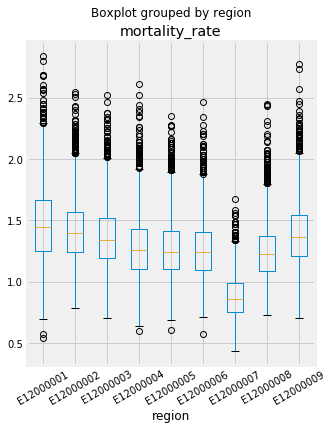

In [34]:
train.boxplot('mortality_rate','region',rot = 30,figsize=(5,6))

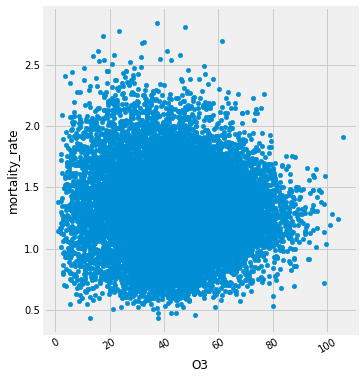

In [35]:
train.plot('O3', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

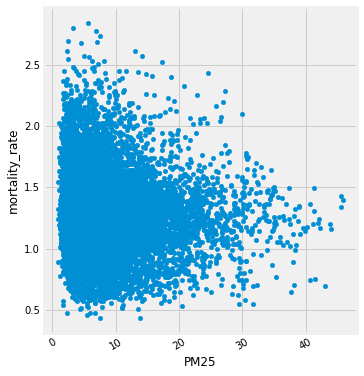

In [36]:
train.plot('PM25', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

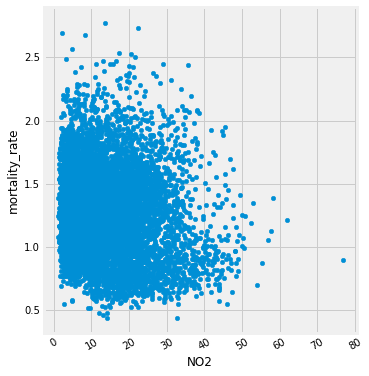

In [37]:
train.plot('NO2', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

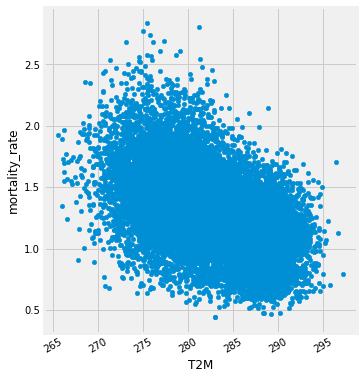

In [38]:
train.plot('T2M', 'mortality_rate',rot = 30, kind = 'scatter' , figsize=(5,6))

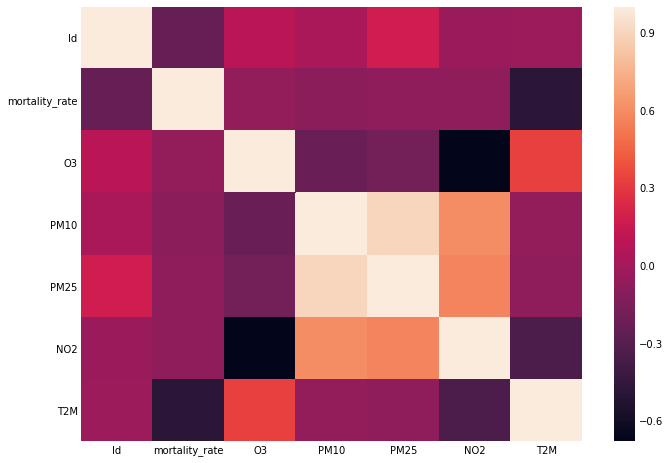

In [42]:
corr = train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [48]:
copy = train.dropna()

Anadir lo que hice en la casa

In [49]:
ax = sns.heatmap(copy)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
ax = sns.heatmap(copy, cmap="YlGnBu")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [18]:
#import boto3
import re
import os
import numpy as np
import pandas as pd
from sklearn import tree

In [33]:
# Read data into pandas dataframe
train_data = train.dropna()
# labels are in the first column
train_y = train_data.iloc[:,3]
# rest of the columns are features
train_X = train_data.iloc[:,4:]

# hyper parameter for Decision Tree
max_leaf_nodes=5
# Now use scikit-learn's decision tree classifier to train the model.
clf = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
clf = clf.fit(train_X, train_y)
clf



ValueError: Unknown label type: 'continuous'

# one hot encoding

In [63]:
# limit to categorical data using df.select_dtypes()
X = train['region']
X.head(3)

0    E12000001
1    E12000001
2    E12000001
Name: region, dtype: object

In [64]:
# check original shape
X.shape

(18403,)

In [92]:
# one hot encoding for region
regions_hot = pd.get_dummies(X, prefix=['region'])
# rename columns 
regions_hot.columns = ["North East","North West","Yorkshire and The Humber","East Midlands", 
                     "West Midlands","East of England","London","South East","South Wes"]
regions_hot.columns

Index(['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands',
       'West Midlands', 'East of England', 'London', 'South East',
       'South Wes'],
      dtype='object')

In [95]:
# drop region column from train data set
train = train.drop(['region'], axis=1)

In [98]:
frames = [regions_hot,train]
result = pd.concat(frames, axis=1, sort=False)
result.head

<bound method NDFrame.head of        North East  North West  Yorkshire and The Humber  East Midlands  \
0               1           0                         0              0   
1               1           0                         0              0   
2               1           0                         0              0   
3               1           0                         0              0   
4               1           0                         0              0   
5               1           0                         0              0   
6               1           0                         0              0   
7               1           0                         0              0   
8               1           0                         0              0   
9               1           0                         0              0   
10              1           0                         0              0   
11              1           0                         0              0   
12      

In [99]:
result.columns

Index(['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands',
       'West Midlands', 'East of England', 'London', 'South East', 'South Wes',
       'Id', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2', 'T2M'],
      dtype='object')

In [100]:
result.shape

(18403, 17)

In [101]:
missing_data(result, 'Result')

Missing values: Result
                          Total  Percent
NO2                        6570    35.70
PM25                       3276    17.80
PM10                          9     0.05
O3                            9     0.05
T2M                           0     0.00
East of England               0     0.00
North West                    0     0.00
Yorkshire and The Humber      0     0.00
East Midlands                 0     0.00
West Midlands                 0     0.00
South Wes                     0     0.00
London                        0     0.00
South East                    0     0.00
Id                            0     0.00
date                          0     0.00
mortality_rate                0     0.00
North East                    0     0.00
